In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D
#from tensorflow.keras import layers 
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

2023-02-05 09:35:06.953427: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-05 09:35:07.266020: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-05 09:35:07.266038: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-05 09:35:08.609003: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
train_path="/home/fansan/Desktop/Document-Classifier/Dataset/data/train/"
test_path="/home/fansan/Desktop/Document-Classifier/Dataset/data/test/"
val_path="/home/fansan/Desktop/Document-Classifier/Dataset/data/valid/"

In [3]:
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_train.append(img_arr)

x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_test.append(img_arr)

x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(224,224))
        x_val.append(img_arr)

In [4]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [5]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [7]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 45 images belonging to 2 classes.
Found 26 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [8]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [9]:
training_set.class_indices

{'aadhar': 0, 'pan': 1}

In [10]:
train_y.shape,test_y.shape,val_y.shape

((45,), (26,), (18,))

In [11]:

#model = Sequential([
#  layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
#  layers.MaxPooling2D(2,2),
#  layers.Conv2D(32, (3,3), activation='relu'),
#  layers.MaxPooling2D(2,2),
#  layers.Conv2D(64, (3,3), activation='relu'),
#  layers.MaxPooling2D(2,2),
#  layers.Flatten(),
#  layers.Dense(1024, activation='relu'),
#  layers.Dense(2,activation='sigmoid')
#])
#################################################
#model=Sequential()
#model.add(Conv2D(28,kernel_size=(3,3),input_shape=(224,224,3)))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Flatten())
#model.add(Dense(128,activation=tf.nn.relu))
#model.add(Dropout(0.1))
#model.add(Dense(2,activation=tf.nn.softmax))
#################################################
model=Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.summary()




2023-02-05 09:35:12.379965: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/fansan/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-02-05 09:35:12.380358: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-05 09:35:12.380406: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fansan-HP-Laptop-15s-du1xxx): /proc/driver/nvidia/version does not exist
2023-02-05 09:35:12.381302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [12]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [24]:
# fit the model
#history = model.fit(
#  np.array(train_x),
#  np.array(train_y),
#  validation_data=(val_x,val_y),
#  epochs=15,
#  callbacks=[early_stop],
#  batch_size=32,shuffle=True)

history=model.fit(training_set,
                  epochs=8,
                  validation_data=val_set,
                  callbacks=[early_stop],
                  batch_size=32,
                  shuffle=True
)

Epoch 1/8
2/2 [==============================] - 5s 2s/step - loss: 0.9070 - accuracy: 0.6000 - val_loss: 0.6937 - val_accuracy: 0.4444
Epoch 2/8
2/2 [==============================] - 4s 3s/step - loss: 0.7414 - accuracy: 0.6000 - val_loss: 0.6945 - val_accuracy: 0.4444
Epoch 3/8
2/2 [==============================] - 4s 2s/step - loss: 0.7035 - accuracy: 0.5556 - val_loss: 0.6938 - val_accuracy: 0.4444
Epoch 4/8
2/2 [==============================] - 4s 3s/step - loss: 0.5711 - accuracy: 0.7778 - val_loss: 0.6918 - val_accuracy: 0.5556
Epoch 5/8
2/2 [==============================] - 4s 2s/step - loss: 0.4949 - accuracy: 0.8222 - val_loss: 0.6853 - val_accuracy: 0.8333
Epoch 6/8
2/2 [==============================] - 4s 2s/step - loss: 0.5650 - accuracy: 0.6000 - val_loss: 0.6751 - val_accuracy: 0.9444
Epoch 7/8
2/2 [==============================] - 4s 2s/step - loss: 0.4750 - accuracy: 0.6889 - val_loss: 0.6835 - val_accuracy: 0.8333
Epoch 8/8
2/2 [==============================] -

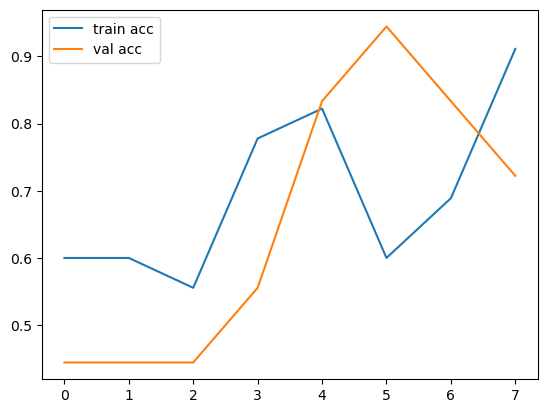

In [25]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('acc1.png')
plt.show()

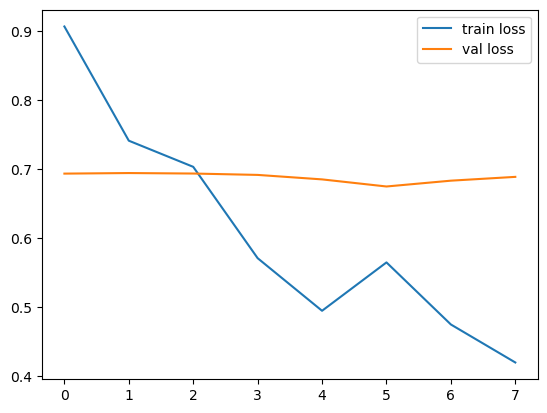

In [26]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.savefig('loss1.png')
plt.show()

In [27]:
model.save('doc_datamodel.h5')

In [28]:
##############################################################
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np

model=load_model('doc_datamodel.h5')
img_width,img_height=224, 224

In [29]:
print("Evaluate model on test data")
results = model.evaluate(test_x, test_y, batch_size=32)
print("test loss, test acc:", results)

Evaluate model on test data
1/1 [==============================] - 1s 533ms/step - loss: 0.6913 - accuracy: 0.6154
test loss, test acc: [0.6912574172019958, 0.6153846383094788]


In [30]:
##prediction##s
#pred_img.reshape(224,224)
#x_pred=np.array([pred_img])
#prediction=model.predict(x_pred)
#print(prediction)


In [31]:
#y_pred=np.argmax(x_pred,axis=1)

In [33]:
pred_img="/home/fansan/Desktop/Document-Classifier/Dataset/testing/"

for img in os.listdir(pred_img):
    img_path=pred_img+img
    print(img)
    img_arr=cv2.imread(img_path)
    #print(pred_img.shape)
    img_arr=cv2.resize(img_arr,(224, 224),3)
    #print(pred_img.shape)
    #print(type(pred_img))
    img_arr=img_to_array(img_arr)
    img_arr=np.expand_dims(img_arr,axis=0)
    predictions=model.predict(img_arr)
    p=predictions.argmax()
    print(p)

test02.jpeg
1/1 [==============================] - 0s 82ms/step
1
test01.jpeg
1/1 [==============================] - 0s 68ms/step
0
test11.jpeg
1/1 [==============================] - 0s 47ms/step
0
test00.jpeg
1/1 [==============================] - 0s 76ms/step
1
test10.jpeg
1/1 [==============================] - 0s 45ms/step
1
test12.jpeg
1/1 [==============================] - 0s 57ms/step
1


In [23]:
print(pred_img)

/home/fansan/Desktop/Document-Classifier/Dataset/testing/


In [3]:
import numpy as np
import cv2

video_capture = cv2.VideoCapture(0)
#video_capture = cv2.VideoCapture('cat1/catkin_ws/src/ros_essentials_cpp/src/topic03_perception/video/ros.mp4')

while(True):
    ret,frame=video_capture.read()
    frame = cv2.resize(frame, (0,0), fx=1,fy=1)
    
    response,color_img = video_capture.read()
    
    width=int(color_img.shape[1]*scale/100)
    height=int(color_img.shape[0]*scale/100)
    dim = (width,height)
    
    color_img=cv2.resize(color_img,dim,interpolation=cv2.INTER_AREA)
    color_face=color_img[y:y+h,x:x+w]
    cv2.imwrite('input/%d%dface.jpg'%(img_count_full,img_count),color_face)
    img=load_img('input/%d%dface.jpg'%(img_count_full,img_count),target_size=(img_width,img_height))  
    
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

NameError: name 'scale' is not defined